In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [44]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\datos_finales.csv"
# Load the Excel file into a DataFrame
df = pd.read_csv(excel_file_path)
# Display the DataFrame
df.head()

,company_name,Ticker1,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),...,Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,segment_list,business_segments_homologation
0,JPMorgan Chase,JPM,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,...,0.111,493.447,NaN,NaN,573.366403,NaN,1421.310034,731.371995,"['Consumer and Community Banking', 'Corporate ...","Investment Banking, Asset Management, Commerci..."
1,Saudi Arabian Oil Company (Saudi Aramco),2222.SR,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,...,-0.057,1.592,16.704,2.304,2000.500446,252.159417,102.104232,76.894523,"['Upstream', 'Downstream', 'and Corporate']","Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,ICBC,601398.SS,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,...,-0.021,16.785,NaN,NaN,253.621212,NaN,879.387100,335.063440,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Asset Man..."
3,China Construction Bank,601939.SS,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,...,0.035,9.131,NaN,NaN,167.292783,NaN,335.591449,471.762979,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Investmen..."
4,Agricultural Bank of China,601288.SS,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,...,0.036,17.970,NaN,NaN,208.051584,NaN,924.515327,544.144009,"['Corporate Banking', 'Personal Banking', 'Tre...","Corporate Banking, Personal Banking, Agricultu..."


labels
Asset Management                   133
Renewable Energy                   108
Investment Banking                 101
Digital Banking                     88
Retail Banking                      88
                                  ... 
Food Delivery                        1
Intelligent Logistics Solutions      1
Automotive Parts                     1
Paints                               1
Trust Banking                        1
Name: count, Length: 2514, dtype: int64


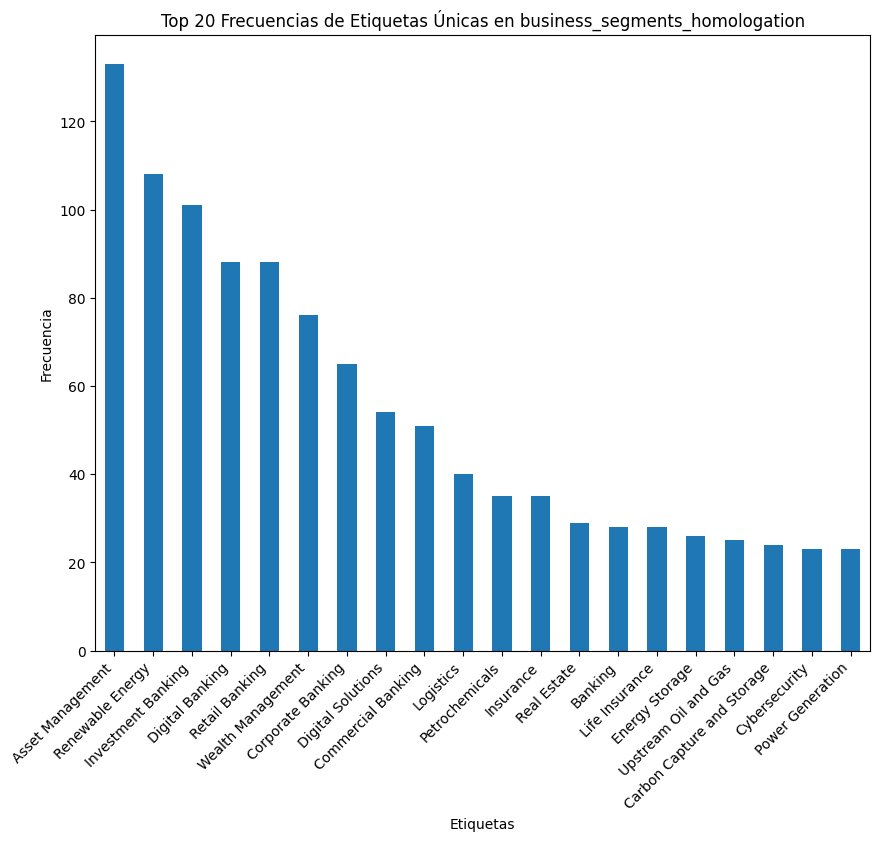

In [45]:
# Asegurarse que la columna de etiquetas sea de tipo string
df['business_segments_homologation'] = df['business_segments_homologation'].astype(str)

# Separar las etiquetas y expandirlas en una lista
df['labels'] = df['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear una serie con todas las etiquetas
all_labels = df['labels'].explode()

# Contar la frecuencia de cada etiqueta
label_counts = all_labels.value_counts()

# Mostrar la tabla de frecuencias ordenada
print(label_counts)

# Graficar las 20 etiquetas más frecuentes
plt.figure(figsize=(10, 8))
label_counts.head(20).plot(kind='bar')
plt.title('Top 20 Frecuencias de Etiquetas Únicas en business_segments_homologation')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploración de datos:

primero debemos realizar una exploración inicial para entender la estructura del conjunto de datos, revisar los datos nulos y determinar qué columnas no son relevantes para el análisis.
Vamos a cargar el archivo datos_finales.csv, visualizar las primeras filas, revisar la presencia de datos nulos y obtener una descripción general de las columnas.

In [46]:
# Mostrar las primeras filas del DataFrame
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company_name                    1099 non-null   object 
 1   Ticker1                         1099 non-null   object 
 2   Industry                        1096 non-null   object 
 3   Country/Territory               1099 non-null   object 
 4   Employees                       1070 non-null   float64
 5   Revenue                         1099 non-null   float64
 6   Assets                          1098 non-null   float64
 7   Profits                         1098 non-null   float64
 8   Sector                          1099 non-null   object 
 9   P/E Ratio (ttm)                 1010 non-null   float64
 10  Forward P/E                     1080 non-null   float64
 11  Diluted EPS (ttm)               1068 non-null   float64
 12  Dividends Per Share             98

c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


(                               company_name    Ticker1  \
 0                            JPMorgan Chase        JPM   
 1  Saudi Arabian Oil Company (Saudi Aramco)    2222.SR   
 2                                      ICBC  601398.SS   
 3                   China Construction Bank  601939.SS   
 4                Agricultural Bank of China  601288.SS   
 
                                             Industry Country/Territory  \
 0                     Banking and Financial Services     United States   
 1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
 2                     Banking and Financial Services             China   
 3                                            Banking             China   
 4                     Banking and Financial Services             China   
 
    Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
 0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
 1    70000.0    589.5   661.0  

# Pipeline para el manejo de datos nulos

In [47]:
# Reemplazar valores específicos en la columna Industry
industry_replacements = {
    'WTW': 'Banking and Financial Services',
    'American Financial Group': 'Banking and Financial Services',
    'Lennar': 'Construction'
}
df.loc[df['company_name'] == 'WTW', 'Industry'] = industry_replacements['WTW']
df.loc[df['company_name'] == 'American Financial Group', 'Industry'] = industry_replacements['American Financial Group']
df.loc[df['company_name'] == 'Lennar', 'Industry'] = industry_replacements['Lennar']


# Eliminar columnas irrelevantes
columns_to_drop = ['company_name', 'Ticker1', 'segment_list','labels']
df_cleaned = df.drop(columns=columns_to_drop)

In [48]:
# Reemplazar valores infinitos por NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Crear un pipeline para manejar los datos nulos en las columnas numéricas
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Aplicar el pipeline a las columnas numéricas
df_cleaned[numeric_features] = numeric_transformer.fit_transform(df_cleaned[numeric_features])

# Verificar la limpieza de los datos
null_counts = df_cleaned.isnull().sum()

# Mostrar las primeras filas del DataFrame limpio y el conteo de valores nulos restantes
print(df_cleaned.head())
print(null_counts)

                                            Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Revenue Per Share (ttm)  \
0    12.22727

In [49]:
df_cleaned.head()

,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Revenue Per Share (ttm),Revenue Growth (y/o/y),Total Cash Per Share,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,business_segments_homologation
0,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,12.227272,16.24,...,49.687,0.111,493.447,72.5415,1.299,573.366403,3.499280,1421.310034,731.371995,"Investment Banking, Asset Management, Commerci..."
1,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,16.956522,1.87,...,7.673,-0.057,1.592,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,"Upstream Oil and Gas, Downstream Oil and Gas, ..."
2,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,5.117647,0.97,...,0.714,-0.021,16.785,72.5415,1.299,253.621212,3.499280,879.387100,335.063440,"Corporate Banking, Personal Banking, Asset Man..."
3,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,4.934307,1.31,...,2.715,0.035,9.131,72.5415,1.299,167.292783,3.499280,335.591449,471.762979,"Corporate Banking, Personal Banking, Investmen..."
4,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,5.376623,0.71,...,1.673,0.036,17.970,72.5415,1.299,208.051584,3.499280,924.515327,544.144009,"Corporate Banking, Personal Banking, Agricultu..."


# Desarrollo de modelos Binary Relevance (BR) y Classifier Chains (CC) usando todas la etiquetas identificadas

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

In [51]:
# Separar características y etiquetas
X = df_cleaned.drop(columns=['business_segments_homologation'])
y = df_cleaned['business_segments_homologation']

# Asegurarnos de que y no contiene valores nulos y convertir a cadenas de texto
y = y.dropna().astype(str)

# Convertir etiquetas a formato binario
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.str.split(', '))

# Convertir las columnas categóricas a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))



KeyboardInterrupt: 

# Desarrollo de modelos Binary Relevance (BR) y Classifier Chains (CC), usnados las dos ultimas etiqeutas y las otras son caracteristicas del datset

In [33]:
# Dividir las etiquetas de 'business_segments_homologation'
df_cleaned['business_segments_homologation'] = df_cleaned['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear nuevas columnas para las tres primeras etiquetas
df_cleaned['label_1'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[0] if len(x) > 0 else None)
df_cleaned['label_2'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[1] if len(x) > 1 else None)
df_cleaned['label_3'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[2] if len(x) > 2 else None)

# Crear una nueva columna para las etiquetas restantes
df_cleaned['remaining_labels'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[3:] if len(x) > 3 else [])

# Mantener solo las columnas relevantes
df_new = df_cleaned.drop(columns=['business_segments_homologation'])

# Mostrar las primeras filas del nuevo DataFrame
df_new.head()

,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,label_1,label_2,label_3,remaining_labels
0,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,12.227272,16.24,...,72.5415,1.299,573.366403,3.499280,1421.310034,731.371995,Investment Banking,Asset Management,Commercial Banking,"[Consumer Banking, Digital Banking, Cryptocurr..."
1,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,16.956522,1.87,...,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,Upstream Oil and Gas,Downstream Oil and Gas,Petrochemicals,"[Renewable Energy, Energy Storage]"
2,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,5.117647,0.97,...,72.5415,1.299,253.621212,3.499280,879.387100,335.063440,Corporate Banking,Personal Banking,Asset Management,"[Investment Banking, Fintech Services]"
3,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,4.934307,1.31,...,72.5415,1.299,167.292783,3.499280,335.591449,471.762979,Corporate Banking,Personal Banking,Investment Banking,"[Asset Management, Digital Banking]"
4,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,5.376623,0.71,...,72.5415,1.299,208.051584,3.499280,924.515327,544.144009,Corporate Banking,Personal Banking,Agricultural Finance,"[Rural Development, Fintech Services]"


In [38]:
count_seg_df = df_new.copy()
count_seg_df

,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Total Debt/Equity,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,label_1,label_2,label_3,remaining_labels
0,Banking and Financial Services,United States,293723.0,179.900,3700.0,41.8000,Financial Services,12.257389,12.227272,16.24,...,72.5415,1.299,573.366403,3.499280,1421.310034,731.371995,Investment Banking,Asset Management,Commercial Banking,"[Consumer Banking, Digital Banking, Cryptocurr..."
1,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.500,661.0,156.4000,Energy,16.684492,16.956522,1.87,...,16.7040,2.304,2000.500446,252.159417,102.104232,76.894523,Upstream Oil and Gas,Downstream Oil and Gas,Petrochemicals,"[Renewable Energy, Energy Storage]"
2,Banking and Financial Services,China,427587.0,216.800,6100.0,52.5000,Financial Services,5.381443,5.117647,0.97,...,72.5415,1.299,253.621212,3.499280,879.387100,335.063440,Corporate Banking,Personal Banking,Asset Management,"[Investment Banking, Fintech Services]"
3,Banking,China,352588.0,203.100,5000.0,48.3000,Financial Services,5.160306,4.934307,1.31,...,72.5415,1.299,167.292783,3.499280,335.591449,471.762979,Corporate Banking,Personal Banking,Investment Banking,"[Asset Management, Digital Banking]"
4,Banking and Financial Services,China,459000.0,186.100,5400.0,37.9000,Financial Services,5.830986,5.376623,0.71,...,72.5415,1.299,208.051584,3.499280,924.515327,544.144009,Corporate Banking,Personal Banking,Agricultural Finance,"[Rural Development, Fintech Services]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,Household & Personal Products,China,15637.0,21.400,15.6,-0.2592,Financial Services,6.698113,6.635514,1.06,...,72.5415,1.299,30.634890,3.499280,195.706689,302.500722,Petrochemicals,Renewable Energy,Energy Storage,"[Carbon Capture and Storage, Sustainable Mater..."
1095,Diversified Financials,China,8391.0,2.500,52.9,0.4031,Financial Services,20.348837,13.257575,0.43,...,199.4340,1.299,10.064842,3.499280,28.673031,23.070408,Investment Banking,Asset Management,Wealth Management,"[Trading and Brokerage, Digital Finance]"
1096,Banking,Japan,2753.0,0.843,49.9,0.1762,Financial Services,26.615301,14.297125,36.99,...,994.4160,1.318,26.859201,3.499280,271.907288,304.111316,Regional Banking,Asset Management,Digital Financial Services,[Consulting]
1097,Banking,China,4402.0,1.900,48.4,0.2740,Industrials,7.830769,5.719101,0.65,...,171.3370,0.926,12.889159,6.909047,15.371780,66.736052,Corporate Banking,Personal Banking,Investment Banking,"[Wealth Management, Digital Banking]"


In [41]:

# Suponiendo que df es tu DataFrame y 'remaining_labels' es la columna con las listas
# Vamos a expandir la lista en filas separadas
all_labels = count_seg_df['remaining_labels'].explode()

# Ahora contamos los valores únicos y sus frecuencias
unique_counts = all_labels.value_counts()

# Mostrar los resultados
print(unique_counts)

remaining_labels
Digital Banking                     87
Asset Management                    55
Digital Solutions                   51
Renewable Energy                    49
Wealth Management                   47
                                    ..
Waste Processing and Recycling       1
Intelligence and Cyber Solutions     1
Index Products                       1
International Banking                1
Trust Banking                        1
Name: count, Length: 1141, dtype: int64


In [10]:
# Convertir las tres primeras etiquetas a variables dummy
df_new = pd.get_dummies(df_new, columns=['label_1', 'label_2', 'label_3'])

# Convertir las etiquetas restantes a formato binario
mlb = MultiLabelBinarizer()
remaining_labels_binary = mlb.fit_transform(df_new['remaining_labels'])

# Convertir el array binario a DataFrame y agregar al DataFrame original
remaining_labels_df = pd.DataFrame(remaining_labels_binary, columns=mlb.classes_, index=df_new.index)
df_final = pd.concat([df_new.drop(columns=['remaining_labels']), remaining_labels_df], axis=1)

# Mostrar las primeras filas del DataFrame final
df_final.head()

,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Wearables,Webscale Routing and Automation,Wildfire Prevention,Wine,Wine Tourism,Wireless Communications,Wireless Telecommunications,Zinc Mining,eMobility Solutions,iGaming
0,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,12.227272,16.24,...,0,0,0,0,0,0,0,0,0,0
1,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,16.956522,1.87,...,0,0,0,0,0,0,0,0,0,0
2,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,5.117647,0.97,...,0,0,0,0,0,0,0,0,0,0
3,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,4.934307,1.31,...,0,0,0,0,0,0,0,0,0,0
4,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,5.376623,0.71,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Separar características y etiquetas
X = df_final.drop(columns=mlb.classes_.tolist())
y = df_final[mlb.classes_.tolist()]

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(879, 2041) (220, 2041) (879, 1141) (220, 1141)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))


Binary Relevance (BR) - Accuracy: 0.0909, Hamming Loss: 0.0015, F1 Score: 0.1630
Classifier Chains (CC) - Accuracy: 0.0909, Hamming Loss: 0.0015, F1 Score: 0.1674


In [52]:
# Concatenar todas las listas de etiquetas en 'remaining_labels' y obtener las etiquetas únicas
remaining_labels_series = df_new['remaining_labels'].explode()
unique_labels = remaining_labels_series.unique()

# Mostrar las primeras 10 etiquetas únicas para ver el formato
unique_labels[:10]

array(['Consumer Banking', 'Digital Banking', 'Cryptocurrency Services',
       'Renewable Energy', 'Energy Storage', 'Investment Banking',
       'Fintech Services', 'Asset Management', 'Rural Development',
       'Commercial Banking'], dtype=object)

In [53]:
# Convertir a DataFrame y guardar en formato CSV
unique_labels_df = pd.DataFrame(list(unique_labels), columns=['Label'])
file_path_unique_labels = 'C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\labels_unicos.csv'
unique_labels_df.to_csv(file_path_unique_labels, index=False)

In [54]:
unique_labels_df

,Label
0,Consumer Banking
1,Digital Banking
2,Cryptocurrency Services
3,Renewable Energy
4,Energy Storage
...,...
1137,Payment Systems
1138,New Financial Infrastructure
1139,Maritime Services
1140,Trading and Brokerage


# Reducción dimencional de etiquetas usando PCA y Agglomerative Clustering

In [55]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\labels_unicos2.csv"
# Load the Excel file into a DataFrame
labels_data = pd.read_csv(excel_file_path, sep=';')
# Display the DataFrame
labels_data.head()

,ID,Label,Definition
0,1,Consumer Banking,"Banking services for individual customers, in..."
1,2,Digital Banking,Online and mobile banking services allowing c...
2,3,Cryptocurrency Services,Financial services related to digital currenc...
3,4,Renewable Energy,Production of energy from sustainable sources...
4,5,Energy Storage,"Technologies for storing energy, such as batt..."


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD

# Combinar el nombre y la descripción en una sola columna para el análisis
combined_text = labels_data['Label'] + " " + labels_data['Definition']

# Inicializar TF-IDF Vectorizer con parámetros refinados
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1,2))

# Transformar los textos en vectores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Aplicar TruncatedSVD para reducir la dimensionalidad
svd = TruncatedSVD(n_components=50)
reduced_data = svd.fit_transform(tfidf_matrix)

# Aplicar Agglomerative Clustering con parámetros refinados
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.0, linkage='ward')
agg_cluster_labels = agg_cluster.fit_predict(reduced_data)

# Crear un DataFrame para ver los resultados del clustering
agg_cluster_results = pd.DataFrame({
    'ID': labels_data['ID'],
    'Label': labels_data['Label'],
    'Cluster': agg_cluster_labels
})

# Agrupar los resultados por cluster y por nombre de label
cluster_summary = agg_cluster_results.groupby('Cluster')['Label'].apply(list).reset_index()

# Guardar el resumen de clusters en un archivo CSV
cluster_summary.to_csv('cluster_summary_by_label.csv', index=False)

# Mostrar los primeros 10 resultados del clustering
print(agg_cluster_results.head(10))
print(cluster_summary.head(10))

   ID                    Label  Cluster
0   1         Consumer Banking       31
1   2          Digital Banking       31
2   3  Cryptocurrency Services       70
3   4         Renewable Energy       23
4   5           Energy Storage       19
5   6       Investment Banking       73
6   7         Fintech Services       37
7   8         Asset Management       38
8   9        Rural Development       80
9  10       Commercial Banking       31
   Cluster                                              Label
0        0  [Digital Finance, Digital Enabled Services, Di...
1        1  [Ride-sharing, Mobility, Mobility Services, Mo...
2        2  [Digital Health, Digital Health Services, Digi...
3        3  [Logistics Automation, Intelligent Manufacturi...
4        4  [Healthcare Logistics, Blockchain-enabled Supp...
5        5  [Digital Solutions, Safety and Productivity So...
6        6  [Blockchain Solutions, Chemicals, Production M...
7        7  [Digital Payments, Blockchain, Smart Grids, Di...
8 

In [63]:
cluster_summary

,Cluster,Label
0,0,"[Digital Finance, Digital Enabled Services, Di..."
1,1,"[Ride-sharing, Mobility, Mobility Services, Mo..."
2,2,"[Digital Health, Digital Health Services, Digi..."
3,3,"[Logistics Automation, Intelligent Manufacturi..."
4,4,"[Healthcare Logistics, Blockchain-enabled Supp..."
...,...,...
85,85,"[Semiconductor Equipment, Gasoline, Coal Minin..."
86,86,"[New Food Ventures, New Food Solutions, New Fo..."
87,87,"[Digital Wealth Management, Digital Mortgage S..."
88,88,"[Healthcare Services, Pharmaceutical Distribut..."


In [64]:
# Crear un diccionario que mapee cada etiqueta a su cluster
label_to_cluster = agg_cluster_results.set_index('Label')['Cluster'].to_dict()

# Crear una copia del DataFrame
df_new_2 = df_new.copy()

# Función para reemplazar las etiquetas por sus clusters
def replace_labels_with_clusters(labels):
    return [label_to_cluster[label] for label in labels if label in label_to_cluster]

# Reemplazar las etiquetas en 'remaining_labels' por los clusters correspondientes
df_new_2['remaining_labels_clusters'] = df_new_2['remaining_labels'].apply(replace_labels_with_clusters)

# Mostrar las primeras filas del DataFrame actualizado
df_new_2.head()

,Industry,Country/Territory,Employees,Revenue,Assets,Profits,Sector,P/E Ratio (ttm),Forward P/E,Diluted EPS (ttm),...,Current Ratio,Market Cap USD,EBITDA (ttm) USD,Total Cash USD,Total Debt USD,label_1,label_2,label_3,remaining_labels,remaining_labels_clusters
0,Banking and Financial Services,United States,293723.0,179.9,3700.0,41.8,Financial Services,12.257389,12.227272,16.24,...,1.299,573.366403,3.499280,1421.310034,731.371995,Investment Banking,Asset Management,Commercial Banking,"[Consumer Banking, Digital Banking, Cryptocurr...","[31, 31, 70]"
1,"Construction, Oil & Gas Operations, Mining and...",Saudi Arabia,70000.0,589.5,661.0,156.4,Energy,16.684492,16.956522,1.87,...,2.304,2000.500446,252.159417,102.104232,76.894523,Upstream Oil and Gas,Downstream Oil and Gas,Petrochemicals,"[Renewable Energy, Energy Storage]","[23, 19]"
2,Banking and Financial Services,China,427587.0,216.8,6100.0,52.5,Financial Services,5.381443,5.117647,0.97,...,1.299,253.621212,3.499280,879.387100,335.063440,Corporate Banking,Personal Banking,Asset Management,"[Investment Banking, Fintech Services]","[73, 37]"
3,Banking,China,352588.0,203.1,5000.0,48.3,Financial Services,5.160306,4.934307,1.31,...,1.299,167.292783,3.499280,335.591449,471.762979,Corporate Banking,Personal Banking,Investment Banking,"[Asset Management, Digital Banking]","[38, 31]"
4,Banking and Financial Services,China,459000.0,186.1,5400.0,37.9,Financial Services,5.830986,5.376623,0.71,...,1.299,208.051584,3.499280,924.515327,544.144009,Corporate Banking,Personal Banking,Agricultural Finance,"[Rural Development, Fintech Services]","[80, 37]"


# Desarrollo de modelos Binary Relevance (BR) y Classifier Chains (CC), usnados los nuevos cluster desarrolados en el paso anterior

In [179]:
# Preparar los datos para la clasificación
# Separar características y etiquetas
X = df_new_2.drop(columns=['remaining_labels', 'remaining_labels_clusters'])
y = df_new_2['remaining_labels_clusters']

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convertir y_train y y_test a formato binario
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train_bin)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train_bin)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test_bin, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test_bin, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))

Binary Relevance (BR) - Accuracy: 0.1409, Hamming Loss: 0.0171, F1 Score: 0.2272
Classifier Chains (CC) - Accuracy: 0.1545, Hamming Loss: 0.0172, F1 Score: 0.2335


# Implementacion de de modelos adicionales Label Powerset (LP) y Multi-output Random Forest, usnados los nuevos cluster desarrolados en el paso anterior

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from skmultilearn.problem_transform import LabelPowerset
from scipy.sparse import csr_matrix

# Separar características y etiquetas
X = df_new_2.drop(columns=['remaining_labels', 'remaining_labels_clusters'])
y = df_new_2['remaining_labels_clusters']

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Asegurarse de que cada elemento de y sea una lista de enteros
y = y.apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir y a formato binario
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_bin, test_size=0.2, random_state=42)

# Asegurarse de que todos los datos sean de tipo float64
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Convertir X_train y X_test a matrices dispersas (requerido por algunos modelos)
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Label Powerset (LP)
lp_classifier = LabelPowerset(base_classifier)
lp_classifier.fit(X_train_sparse, y_train)
y_pred_lp = lp_classifier.predict(X_test_sparse)

# Multi-output Random Forest
mo_classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
mo_classifier.fit(X_train, y_train)
y_pred_mo = mo_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Evaluar Label Powerset
accuracy_lp, hamming_lp, f1_lp = evaluate_model(y_test, y_pred_lp)

# Evaluar Multi-output Random Forest
accuracy_mo, hamming_mo, f1_mo = evaluate_model(y_test, y_pred_mo)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))
print("Label Powerset (LP) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_lp, hamming_lp, f1_lp))
print("Multi-output Random Forest (MO) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_mo, hamming_mo, f1_mo))



Binary Relevance (BR) - Accuracy: 0.1273, Hamming Loss: 0.0176, F1 Score: 0.2197
Classifier Chains (CC) - Accuracy: 0.1273, Hamming Loss: 0.0175, F1 Score: 0.2237
Label Powerset (LP) - Accuracy: 0.1591, Hamming Loss: 0.0271, F1 Score: 0.3245
Multi-output Random Forest (MO) - Accuracy: 0.1273, Hamming Loss: 0.0176, F1 Score: 0.2197


# Implementacion de GridSearchCV para mejroara los parametros del modelo y de esta fromas su compartamiento

In [69]:
from sklearn.model_selection import GridSearchCV
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

# Crear un scorer personalizado
def multi_label_accuracy(y_true, y_pred, **kwargs):
    return np.mean(np.all(y_true == y_pred, axis=1))

# Usar make_scorer para convertir la función de accuracy personalizada en un scorer
accuracy_scorer = make_scorer(multi_label_accuracy)

# Definir el clasificador base y el LabelPowerset
base_classifier = RandomForestClassifier(random_state=42)
lp_classifier = LabelPowerset(classifier=base_classifier)

# Definir el grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=lp_classifier, param_grid=param_grid, cv=3, scoring=accuracy_scorer, verbose=2)

# Ajustar Grid Search al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la mejor puntuación obtenida
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación de accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   7.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   7.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   8.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   6.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   6.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   7.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   2.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   7.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   6.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   6.9s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.8s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   2.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   2.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.8s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   2.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.8s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   2.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=20, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   2.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   3.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   3.8s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   4.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.0s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.3s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   2.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   3.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   3.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   3.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.1s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.2s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.4s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   2.5s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   3.6s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   3.7s


c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\sklearn\metrics\_score

[CV] END classifier__max_depth=30, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   3.5s
Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Mejor puntuación de accuracy: nan


In [72]:
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import f1_score
from scipy.sparse import csr_matrix

# Convertir X_train y X_test a matrices dispersas si aún no lo están
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Definir el clasificador base con los mejores hiperparámetros
base_classifier = RandomForestClassifier(
    n_estimators=100,  # Número óptimo de árboles
    max_depth=None,    # Profundidad máxima
    min_samples_split=2,  # Mínimo número de muestras para dividir un nodo
    random_state=42
)

# Crear el clasificador Label Powerset con el clasificador base
lp_classifier = LabelPowerset(classifier=base_classifier)

# Entrenar el modelo
lp_classifier.fit(X_train_sparse, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = lp_classifier.predict(X_test_sparse)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
hamming = hamming_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Hamming Loss:", hamming)

F1 Score: 0.32452830188679244
Accuracy: 0.1590909090909091
Hamming Loss: 0.027121212121212122
